### Author - Kulwant Singh Dhama
### Mob. no. - 9887699988
### Date - 15 / 09 / 2020

# Covid Dataset Analysis (Major Project)

1. Load dataset from - https://raw.githubusercontent.com/Walker2921/Data-Analytics/master/Covid%20Project/owid-covid-data.csv
2. Subset only those rows that have “India” in the “location” column(This subsetted dataframe has to be used for modelling)
3. Handle Missing values:
    * If there are null values in continuous numerical column, replace the null values by the mean of that column.
    * If there are null values in ordinal numerical column, replace the null values by the mode of that column.
    * If there are null values in categorical column, replace the null values by the mode of that column.
    * If more than 50%the values in a column are null, then drop that entire column
4. Univariate Analysis:
    * Draw histograms of 10 feature columns
    * Find mean, median and mode of each column
5. Bivariate Analysis:
    * Draw scatter plots of target column versus 10 features
    * Draw line plots of target column versus 10 features
6. Convert date column to ordinal
    * Code:
    
    import datetime as dt
    
    df["date"]=pd.to_datetime(df["date"])
    
    df["date"]=df["date"].map(dt.datetime.toordinal)
7. Drop useless categorical columns, and convert useful categorical to numerical by
   labelencoder
8. Select “total_cases” column as the target variable
9. Select the other columns as the features.
    
    (NOTE: the “date” column has to be compulsorily in the features) racy
10. Perform train-test split
11. Modelling:
    * Linear Regression
    * Random Forest Regressor
    * Decision Tree Regression
12. Get accuracy
13. Predict Total case for a new date

NOTE: To convert anytime back from ordinal to date-time use the following sample code:

from datetime import datetime

ordinal value = 733828 # This is an example

dt = datetime.fromordinal(ordinal value)

# Introducing Dataset
##### 1. Load dataset from - https://raw.githubusercontent.com/Walker2921/Data-Analytics/master/Covid%20Project/owid-covid-data.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import datetime as dt

%matplotlib inline

In [2]:
location = r"https://raw.githubusercontent.com/Walker2921/Data-Analytics/master/Covid%20Project/owid-covid-data.csv"
raw_data_set = pd.read_csv(location)
raw_data_set.shape

(41170, 40)

In [3]:
raw_data_set.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29


In [4]:
raw_data_set.drop_duplicates()
raw_data_set.describe(include = "all")

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
count,40923,40676,41170,41170,4.059500e+04,40412.000000,39630.000000,40595.000000,40412.000000,39630.000000,...,36572.000000,36303.000000,24243.000000,36775.000000,38057.000000,28952.000000,28591.000000,17089.000000,33304.000000,40416.000000
unique,211,6,212,247,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,IRL,Europe,World,2020-08-08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,247,10947,247,212,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,7.834294e+04,1275.690438,1261.811431,3467.239192,42.435316,42.490974,...,5.903041,21130.351916,11.862670,250.893746,8.045772,10.871221,32.639518,52.792931,3.124194,74.105508
std,NaN,NaN,NaN,NaN,8.112295e+05,11697.096462,11491.036415,32497.126723,361.814499,352.251872,...,4.331043,20539.427771,19.025917,117.786520,4.134955,10.487772,13.393134,31.536078,2.537883,7.352293
min,NaN,NaN,NaN,NaN,0.000000e+00,-2461.000000,-338.857000,0.000000,-1918.000000,-232.143000,...,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000
25%,NaN,NaN,NaN,NaN,3.800000e+01,0.000000,0.429000,0.000000,0.000000,0.000000,...,2.142000,5591.597000,0.500000,153.507000,5.310000,1.900000,21.400000,21.222000,1.300000,69.910000
50%,NaN,NaN,NaN,NaN,7.630000e+02,8.000000,12.429000,13.000000,0.000000,0.143000,...,4.419000,14103.452000,1.800000,237.372000,7.110000,6.434000,31.400000,55.182000,2.500000,75.490000
75%,NaN,NaN,NaN,NaN,8.297500e+03,140.000000,144.857000,173.000000,2.000000,2.714000,...,9.719000,32605.906000,15.000000,318.949000,10.180000,19.600000,40.900000,83.741000,4.200000,79.930000


In [5]:
def info_table(raw_data_set):
    unique_values = []
    not_null_count = []
    null_count = []
    is_null = []
    for i in list(raw_data_set.columns.values):
        unique_values.append(raw_data_set[i].value_counts().count())
        null_count.append(raw_data_set[i].isnull().sum())
        k = raw_data_set.shape[0] - null_count[-1]
        not_null_count.append(str(k) + " non-null")
        is_null.append(str(round(raw_data_set[i].isnull().sum()/len(raw_data_set)*100, 2))+"%")
    
    temp = {"unique_values" : unique_values, 
            "not_null_count" : not_null_count, 
            "is_null" : is_null, 
            "null_count" : null_count, 
            "Dtypes" : raw_data_set.dtypes}
    df = pd.DataFrame(temp, columns = ["unique_values", 
                                       "not_null_count", 
                                       "is_null", 
                                       "null_count", 
                                       "Dtypes"])
    return df

In [6]:
info_table(raw_data_set)

,unique_values,not_null_count,is_null,null_count,Dtypes
iso_code,211,40923 non-null,0.6%,247,object
continent,6,40676 non-null,1.2%,494,object
location,212,41170 non-null,0.0%,0,object
date,247,41170 non-null,0.0%,0,object
total_cases,14441,40595 non-null,1.4%,575,float64
new_cases,3629,40412 non-null,1.84%,758,float64
new_cases_smoothed,7792,39630 non-null,3.74%,1540,float64
total_deaths,4974,40595 non-null,1.4%,575,float64
new_deaths,977,40412 non-null,1.84%,758,float64
new_deaths_smoothed,2087,39630 non-null,3.74%,1540,float64


## Data Manipulation 

##### 2. Subset only those rows that have “India” in the “location” column(This subsetted dataframe has to be used for modelling)

In [7]:
data_set = raw_data_set[raw_data_set.location == "India"]
temp_data_set = data_set

##### 3. Handling Missing values:

In [8]:
temp = info_table(data_set)
temp["col_names"] = data_set.columns.values
o = []
f = []
for i, j in zip(temp["Dtypes"], temp["col_names"]):
    if i == object:
        o.append(j)
    elif i == float:
        f.append(j)

##### a. If more than 50% the values in a column are null, then drop that entire column.

In [9]:
for i, j in zip(temp["is_null"], temp["col_names"]):
    if float(i[:len(i)-1]) > 50:
        data_set.drop(j, axis=1, inplace = True)

#####     b. If there are null values in categorical column, replace the null values by the mode of that column.

In [10]:
k = info_table(data_set[o])
k["col_names"] = data_set[o].columns.values
k

,unique_values,not_null_count,is_null,null_count,Dtypes,col_names
iso_code,1,247 non-null,0.0%,0,object,iso_code
continent,1,247 non-null,0.0%,0,object,continent
location,1,247 non-null,0.0%,0,object,location
date,247,247 non-null,0.0%,0,object,date
tests_units,1,174 non-null,29.55%,73,object,tests_units


In [11]:
for i, j in zip(k["null_count"], k["col_names"]):
    if i > 0:
        data_set[j].fillna(value = data_set[j].mode()[0], inplace = True)

D:\Python_Programming\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


#####     c. If there are null values in continuous numerical column, replace the null values by the mean of that column.

In [12]:
k = info_table(data_set[f])
k["col_names"] = data_set[f].columns.values
k

,unique_values,not_null_count,is_null,null_count,Dtypes,col_names
total_cases,187,246 non-null,0.4%,1,float64,total_cases
new_cases,180,246 non-null,0.4%,1,float64,new_cases
new_cases_smoothed,185,241 non-null,2.43%,6,float64,new_cases_smoothed
total_deaths,168,246 non-null,0.4%,1,float64,total_deaths
new_deaths,151,246 non-null,0.4%,1,float64,new_deaths
new_deaths_smoothed,165,241 non-null,2.43%,6,float64,new_deaths_smoothed
total_cases_per_million,185,246 non-null,0.4%,1,float64,total_cases_per_million
new_cases_per_million,178,246 non-null,0.4%,1,float64,new_cases_per_million
new_cases_smoothed_per_million,175,241 non-null,2.43%,6,float64,new_cases_smoothed_per_million
total_deaths_per_million,167,246 non-null,0.4%,1,float64,total_deaths_per_million


In [13]:
for i, j in zip(k["null_count"], k["col_names"]):
    if i > 0:
        val = data_set[j].mean()
        data_set[j].fillna(value = val, inplace = True)

D:\Python_Programming\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


#####     d. If there are null values in ordinal numerical column, replace the null values by the mode of that column.

##### Note - There is no ordinal numerical column in this dataset.

# Data Analysis 

##### 4. Univariate Analysis:
##### a. Draw histograms of 10 feature columns

In [14]:
k = data_set[["new_cases", "new_deaths", "total_deaths", "new_tests", "total_tests", "tests_per_case", 
              "positive_rate", "total_cases_per_million", "total_deaths_per_million", "total_tests_per_thousand"]]
t = k.columns

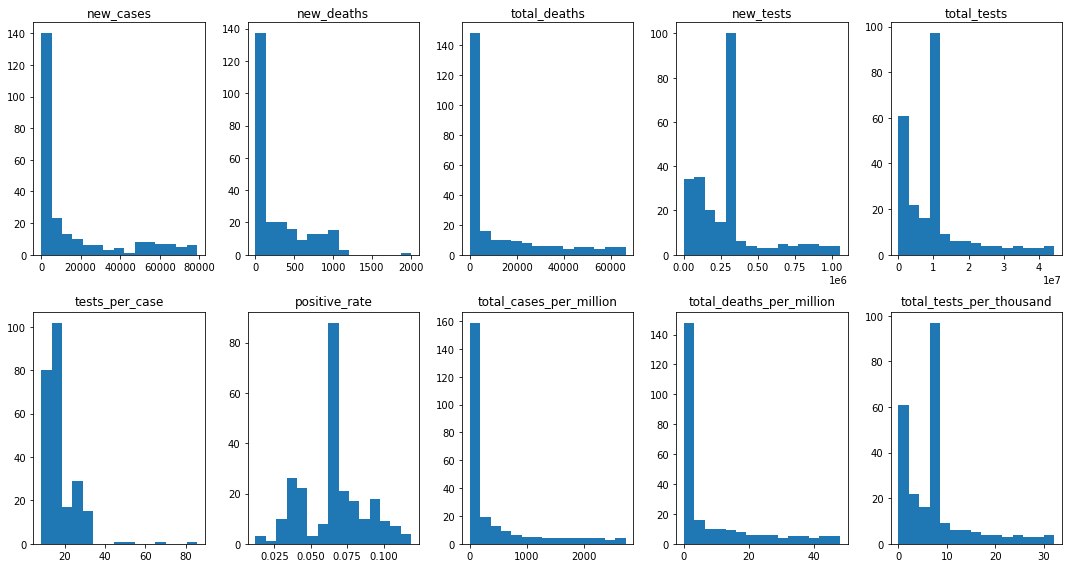

In [15]:
f,a = plt.subplots(2,5)
f.set_figheight(8)
f.set_figwidth(15)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(k.iloc[:,idx], bins=int(np.sqrt(len(data_set))))
    ax.set_title(t[idx])
plt.tight_layout()

##### b. Find mean, median and mode of each column.

In [16]:
k_mean = []
k_median = []
k_mode = []
for i in range(10):
    k_mean.append(round(statistics.mean(k.iloc[:,i])))
    k_median.append(round(statistics.median(k.iloc[:,i])))
    k_mode.append(round(statistics.mode(k.iloc[:,i])))
data = {"Mean":k_mean, "Median":k_median, "Mode":k_mode}
temp = pd.DataFrame(data)
temp.index = t
temp

,Mean,Median,Mode
new_cases,15323,2553,0
new_deaths,270,73,0
total_deaths,11794,1301,0
new_tests,283348,283348,283348
total_tests,10337534,10337534,10337534
tests_per_case,19,19,19
positive_rate,0,0,0
total_cases_per_million,394,29,0
total_deaths_per_million,9,1,0
total_tests_per_thousand,7,7,7


##### 5. Bivariate Analysis:
##### a. Draw scatter plots of target column versus 10 features

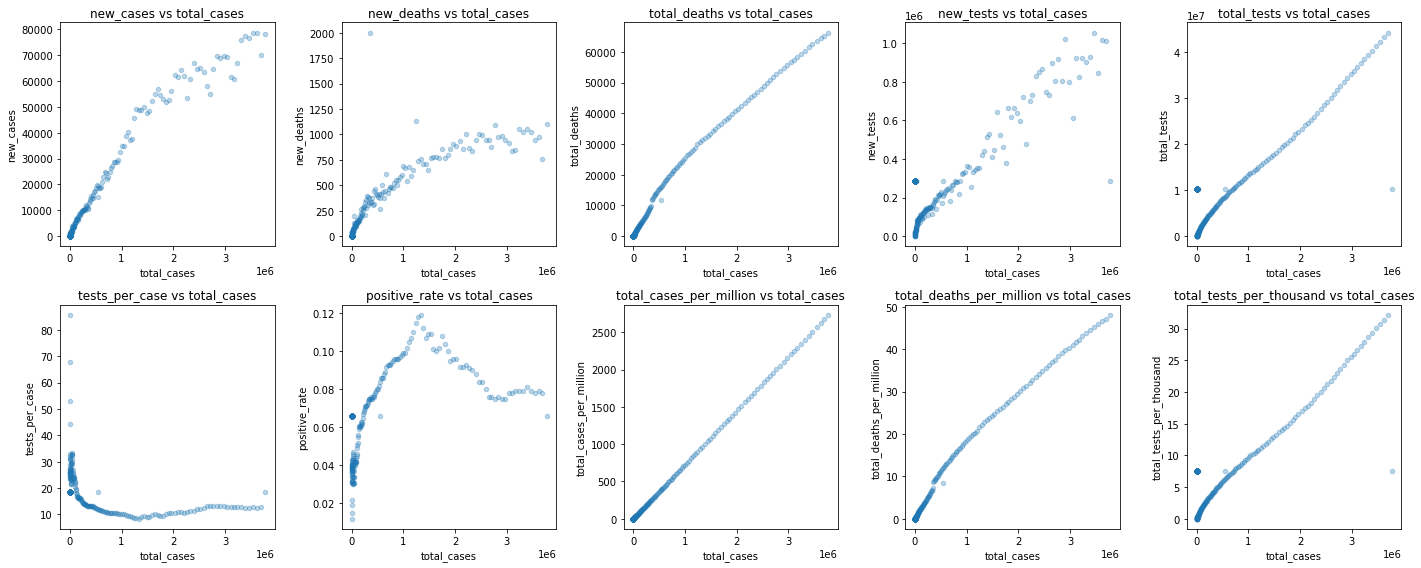

In [17]:
f,a = plt.subplots(2,5)
f.set_figheight(8)
f.set_figwidth(20)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.scatter(data_set[["total_cases"]], k.iloc[:,idx], alpha = 0.3, s = 20)
    ax.set_title(t[idx] + " vs total_cases")
    ax.set_xlabel("total_cases")
    ax.set_ylabel(t[idx])
plt.tight_layout()

##### b. Draw line plots of target column versus 10 features

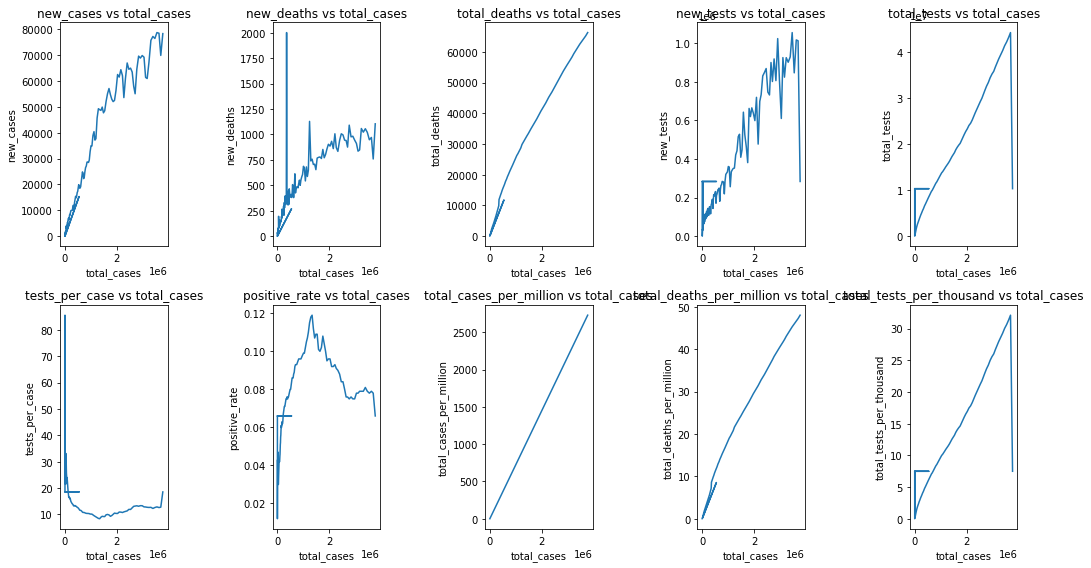

In [18]:
f,a = plt.subplots(2,5)
f.set_figheight(8)
f.set_figwidth(15)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.plot(data_set[["total_cases"]], k.iloc[:,idx])
    ax.set_title(t[idx] + " vs total_cases")
    ax.set_xlabel("total_cases")
    ax.set_ylabel(t[idx])
plt.tight_layout()

# Model Prepration

##### 6. Convert date column to ordinal

In [19]:
temp_data_set["date"] = pd.to_datetime(temp_data_set["date"])
temp_data_set["date"] = temp_data_set["date"].map(dt.datetime.toordinal)

<ipython-input-19-3daabbb8bd66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data_set["date"] = pd.to_datetime(temp_data_set["date"])
<ipython-input-19-3daabbb8bd66>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data_set["date"] = temp_data_set["date"].map(dt.datetime.toordinal)


##### 7. Drop useless categorical columns, and convert useful categorical to numerical by labelencoder

In [20]:
data_set.drop(["new_cases_smoothed", "new_deaths_smoothed", "new_cases_per_million", "new_cases_smoothed_per_million", 
               "new_deaths_per_million", "new_deaths_smoothed_per_million", "new_tests_per_thousand", "new_tests_smoothed", 
               "new_tests_smoothed_per_thousand", "iso_code", "continent", "location" ,"tests_units", 
                 "population", "population_density", "median_age", 
                 "aged_65_older", "aged_70_older", "gdp_per_capita", 
                 "extreme_poverty", "cardiovasc_death_rate", 
                 "diabetes_prevalence", "female_smokers", "male_smokers", 
                 "handwashing_facilities", "hospital_beds_per_thousand", 
                 "life_expectancy"], axis = 1, inplace = True)

D:\Python_Programming\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [21]:
info_table(data_set)

,unique_values,not_null_count,is_null,null_count,Dtypes
date,247,247 non-null,0.0%,0,int64
total_cases,188,247 non-null,0.0%,0,float64
new_cases,181,247 non-null,0.0%,0,float64
total_deaths,169,247 non-null,0.0%,0,float64
new_deaths,152,247 non-null,0.0%,0,float64
total_cases_per_million,186,247 non-null,0.0%,0,float64
total_deaths_per_million,168,247 non-null,0.0%,0,float64
new_tests,157,247 non-null,0.0%,0,float64
total_tests,163,247 non-null,0.0%,0,float64
total_tests_per_thousand,160,247 non-null,0.0%,0,float64


##### Note: After droping the useless columns there isn't any categorical column available 

##### 8. Select “total_cases” column as the target variable

In [22]:
Y = data_set["total_cases"]

##### 9. Select the other columns as the features.
##### NOTE: the “date” column has to be compulsorily in the features

In [23]:
X = data_set.drop(["total_cases"], axis = 1)

##### 10. Perform train-test split

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=21)

##### 11. Modeling
##### a. Linear Regression Model

In [25]:
from sklearn.linear_model import LinearRegression

Linear_Regression_Model = LinearRegression()
Linear_Regression_Model.fit(X_train, Y_train)

LinearRegression()

##### b. Random Forest Regressor

In [26]:
from sklearn.ensemble import RandomForestRegressor

Random_Forest_Regressor_Model = RandomForestRegressor()
Random_Forest_Regressor_Model.fit(X_train, Y_train)

RandomForestRegressor()

##### c. Decision Tree Regression 

In [27]:
from sklearn.tree import DecisionTreeRegressor

Decision_Tree_Regressor_Model = DecisionTreeRegressor(random_state = 21)
Decision_Tree_Regressor_Model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=21)

##### 12. Get Accuracy 

In [28]:
Linear_Regression_Model.score(X_test, Y_test)

0.9999999999998678

In [29]:
Random_Forest_Regressor_Model.score(X_test, Y_test)

0.9989491708415069

In [30]:
Decision_Tree_Regressor_Model.score(X_test, Y_test)

0.9983298055782431

##### 13. Predict Total cases for a new date

In [31]:
data = {"date" : ["2020-09-21", "2020-09-22"], 
        "new_cases" : [119.0, 17296.0], 
        "total_deaths" : [63498.0, 15301.0], 
        "new_deaths" : [948.0, 407.0], 
        "total_cases_per_million" : [2567.190, 355.362], 
        "total_deaths_per_million" : [46.013, 18.552],
        "new_tests" : [207871.0, 220479.0], 
        "total_tests" : [7560782.0, 42307914.0], 
        "total_tests_per_thousand" : [30.658, 5.795], 
        "tests_per_case" : [12.839, 12.839], 
        "positive_rate" : [0.080, 0.080], 
        "stringency_index" : [59.742479, 86.570000]}

In [32]:
data = pd.DataFrame(data)
data["date"] = pd.to_datetime(data["date"])
data["date"] = data["date"].map(dt.datetime.toordinal)
data

,date,new_cases,total_deaths,new_deaths,total_cases_per_million,total_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,tests_per_case,positive_rate,stringency_index
0,737689,119.0,63498.0,948.0,2567.190,46.013,207871.0,7560782.0,30.658,12.839,0.08,59.742479
1,737690,17296.0,15301.0,407.0,355.362,18.552,220479.0,42307914.0,5.795,12.839,0.08,86.570000


In [33]:
LRM = Linear_Regression_Model.predict(data)
RFRM = Random_Forest_Regressor_Model.predict(data)
DTRM = Decision_Tree_Regressor_Model.predict(data)
k = pd.DataFrame([list(LRM), list(RFRM), list(DTRM)])

In [34]:
k.round()
k = k.T
k.columns = ["Linear_Regression_Model", "Random_Forest_Regressor_Model", "Decision_Tree_Regressor_Model"]
k.index = list(data["date"].apply(dt.datetime.fromordinal))
k.Linear_Regression_Model = k.Linear_Regression_Model.astype(int)
k.Random_Forest_Regressor_Model = k.Random_Forest_Regressor_Model.astype(int)
k.Decision_Tree_Regressor_Model = k.Decision_Tree_Regressor_Model.astype(int)

In [35]:
k

,Linear_Regression_Model,Random_Forest_Regressor_Model,Decision_Tree_Regressor_Model
2020-09-21,3541780,2537464,3463972
2020-09-22,491728,1077369,604641
